In [2]:
# I really likes these in alphabetial order, and sorted by 'import' then 'from'
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from env import user, password, host
from scipy import stats

A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a Poisson distribution with a mean of 2 cars. Make a chart of this distribution and answer these questions concerning the probability of cars waiting at the drive-up window.



In [3]:
# Poisson are a bit confusing to me.

# This is the mean or average chance of a result in a Poisson
λ = 2

What is the probability that no cars drive up in the noon hour?
What is the probability that 3 or more cars come through the drive through?
How likely is it that the drive through gets at least 1 car?


In [4]:
# We're looking for a particular value, and we can only have whole cars (descrete), so it's going to be pmf.
stats.poisson(λ).pmf(0) # This is a long number, so we'll round to the nearest percent.
round(stats.poisson(λ).pmf(0), 2) # Now to make it pretty.
print(f"~{(round(stats.poisson(λ).pmf(0) * 100))}% chance of no cars.")

~14% chance of no cars.


In [5]:
# looking for greater than 2 (aka 3 or more), so it's an SF, using the number we want greater than (2)
stats.poisson(λ).sf(2)
# make it pretty?
print(f"~{round(stats.poisson(λ).sf(2) * 100)}% chance of 3 or more cars")

~32% chance of 3 or more cars


In [6]:
# This is still a greater than, just of 0 this time.
stats.poisson(λ).sf(0)
# making it pretty.
print(f"~{round(stats.poisson(λ).sf(0) * 100)}% chance of at least 1 car")

~86% chance of at least 1 car


Grades of State University graduates are normally distributed with a mean of 3.0 and a standard deviation of .3. Calculate the following:

- What grade point average is required to be in the top 5% of the graduating class?
- What GPA constitutes the bottom 15% of the class?
- An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for this scholarship?
- If I have a GPA of 3.5, what percentile am I in?


In [7]:
# I'm not a maths major, I think I'll stick with English in my code, the Lambda from the last one was... bad enough.
grade_mean = 3.0
grade_sd = 0.3

In [8]:
# normal distribution so:
grade_distribution = stats.norm(grade_mean,grade_sd)

In [9]:
# we're looking for value of a probability, what do we need to be in the top 5%? 
# It seems we can use both isf (the greater than) or the up to and incuding a point?
grade_distribution.isf(0.05)
grade_distribution.ppf(0.95)
grade_distribution.ppf(0.95) == grade_distribution.isf(0.05)

True

In [10]:
# GPA are normally rounded to the hundereds place, so I'm doing so here too.

print(f"Need a {round(grade_distribution.isf(0.05),2)} GPA or higher to be in the top 5%")

Need a 3.49 GPA or higher to be in the top 5%


In [11]:
# now the bottom 15%
grade_distribution.ppf(0.15)
print(f"A GPA of {round(grade_distribution.ppf(0.15),2)} or Lower constitutes the lower 15% of class.")


A GPA of 2.69 or Lower constitutes the lower 15% of class.


In [12]:
range_third_dec_grade_dist = grade_distribution.ppf([0.2, 0.3])
range_third_dec_grade_dist
print(f"2.8 GPA falls between {range_third_dec_grade_dist}, so a student with a 2.8 would qualify for the scholarship.")

2.8 GPA falls between [2.74751363 2.84267985], so a student with a 2.8 would qualify for the scholarship.


In [13]:
round(grade_distribution.sf(3.5),2)
print("A GPA of 3.5 is in the top 5%")

A GPA of 3.5 is in the top 5%


In [14]:
round(grade_distribution.cdf(3.5),2)
# I don't know how to phrase the opposite for being higher than 95% 
# of the class.

0.95

A marketing website has an average click-through rate of 2%. One day they observe 4326 visitors and 97 click-throughs. How likely is it that this many people or more click through?



In [15]:
visits = 4326
click_rate = 0.02
click_distribution = stats.binom(visits,click_rate)

In [16]:
click_distribution.sf(96) # because SF does greater than not equal to, we drop our number one digit 97 -> 96

0.13975823631416445

In [17]:
# This seems to be checking our sf work? (following are notes from the review)
clicks =  np.random.choice([0,1], size=(10_000, 4326), p=(.98,0.02)) # Setting up yes or or no clicks, for 10,000 trials of 4326 visitors, and setting the probability of clicks to 98% not click, 2% click.
clicks

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [24]:
(clicks.sum(axis=1) >= 97).mean() 
# This time around it was 0.1343 where SF was ~0.1398

0.1343

In [26]:
# Poisson?
lamb = visits * click_rate
stats.poisson(lamb).sf(96)

0.14211867659283192

In [27]:
# So all three have a slightly different probability, 
# ranging from 0.1421 to 0.1343, 
# with our binomial falling slightly nearer the middle of the range at 0.1398.

You are working on some statistics homework consisting of 100 questions where all of the answers are a probability rounded to the hundreths place. Looking to save time, you put down random probabilities as the answer to each question. 
What is the probability that at least one of your first 60 answers is correct?


In [22]:
questions = 100
quest_trial = 60
correct = 0.01 # because it's 1 out of 100 so 1%

stats.binom(quest_trial, correct).sf(0)
print(f"{round(stats.binom(quest_trial, correct).sf(0),4)*100}% chance to be correct")

45.28% chance to be correct


The codeup staff tends to get upset when the student break area is not cleaned up. Suppose that there's a 3% chance that any one student cleans the break area when they visit it, and, on any given day, about 90% of the 3 active cohorts of 22 students visit the break area. How likely is it that the break area gets cleaned up each day? How likely is it that it goes two days without getting cleaned up? All week?



In [35]:
cohort_students = round(22 * 3 * 0.9)
clean_prob = 0.03
clean_dist = stats.binom(cohort_students, clean_prob)
clean_dist.sf(0) # Since we want 1 or more, sf is lowered to reflect wanting to include 1


0.8342199288437352

In [36]:
# two days without, aka double the students
stats.binom(cohort_students*2,clean_prob).pmf(0)

0.027483031992576134

In [37]:
# all week (aka 5 days), 5 times the students!
stats.binom(cohort_students*5,clean_prob).pmf(0)
# A 0.01% chance it won't get cleaned all week.

0.00012521651388091245

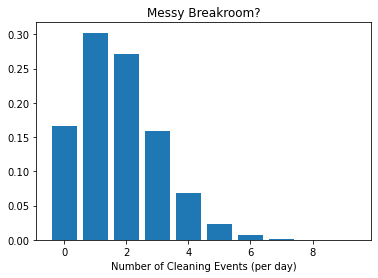

In [39]:
# Teacher added a graph, it was very interesting so please have it:
x = np.arange(0,10)
y = stats.binom(cohort_students,clean_prob).pmf(x)
plt.bar(x,y)
plt.xlabel("Number of Cleaning Events (per day)")
plt.title('Messy Breakroom?')
plt.show()

You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime. After several weeks of careful observation, you notice that the average number of people in line when your lunch break starts is normally distributed with a mean of 15 and standard deviation of 3. If it takes 2 minutes for each person to order, and 10 minutes from ordering to getting your food, what is the likelihood that you have at least 15 minutes left to eat your food before you have to go back to class? Assume you have one hour for lunch, and ignore travel time to and from La Panaderia.



In [46]:
# All the variables might look a bit messy, but it makes it easier to come in 
# and change things later, instead of having a bunch of unlabeled numbers floating around.
order_time = 2
line_mean = 15 * order_time
line_sd = 3 * order_time
time_to_food = 10
time_to_eat = 15
my_time = 60 - time_to_eat - time_to_food - order_time

In [47]:
stats.norm(line_mean,line_sd).cdf(my_time)

0.6914624612740131

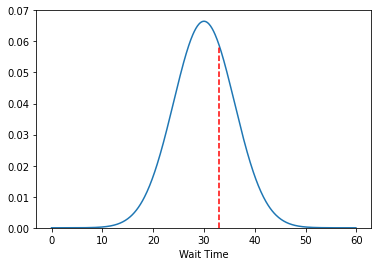

In [49]:
# Teacher did another interesting graph:
x = np.arange(0, 60, 0.1)
y = stats.norm(line_mean,line_sd).pdf(x)

plt.plot(x,y)
plt.vlines(33, 0, stats.norm(line_mean,line_sd).pdf(33), ls = "--", color = "red")
plt.ylim(0,0.07)
plt.xlabel('Wait Time')
plt.show()

Connect to the employees database and find the average salary of current employees, along with the standard deviation. For the following questions, calculate the answer based on modeling the employees salaries with a normal distribution defined by the calculated mean and standard deviation then compare this answer to the actual values present in the salaries dataset.

What percent of employees earn less than 60,000?
What percent of employees earn more than 95,000?
What percent of employees earn between 65,000 and 80,000?
What do the top 5% of employees make?

In [19]:
url = f'mysql+pymysql://{user}:{password}@{host}/employees'
query = '''
SELECT * FROM salaries s 
WHERE s.to_date > NOW()
'''

current_salaries = pd.read_sql(query,url)

In [20]:
current_salaries.head()

,emp_no,salary,from_date,to_date
0,10001,88958,2002-06-22,9999-01-01
1,10002,72527,2001-08-02,9999-01-01
2,10003,43311,2001-12-01,9999-01-01
3,10004,74057,2001-11-27,9999-01-01
4,10005,94692,2001-09-09,9999-01-01


In [51]:
sal_mean = current_salaries.salary.mean()
sal_sd = current_salaries.salary.std()

In [52]:
stats.norm(sal_mean,sal_sd).cdf(60_000)

0.24385742480214423

In [53]:
stats.norm(sal_mean,sal_sd).sf(95_000)

0.09208819199804053

In [54]:
# Numpy has a function for difference! So I don't have to do xxx.max() - xxx.min() to get range and go from there.
np.diff(stats.norm(sal_mean,sal_sd).cdf([65000, 80000]))

array([0.33506057])

In [60]:
# Rounding money to the cents place~
round(stats.norm(sal_mean,sal_sd).isf(0.05),2)

100484.64

In [61]:
# Or a Quantile?? The result is a little different but it's interesting you can do it this way.
round(current_salaries.salary.quantile(0.95),2)

104225.85